<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Play-store-App-Review-EDA/blob/main/Play_Store_App_Review_EDA_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

<b>Exploratory Data Analysis</b>(EDA):- it is a step wise process of performing initial analysis and visual inspection on data so as to discover patterns,to spot expected and to check assumptions with the help of statistics and graphical representations.

<b>App Store</b>. 
App stores or app marketplaces are digital distribution platforms for mobile and desktop apps. They offer online users a plethora of apps to browse through, purchase or download for free - a concept that is proving increasingly successful around the world. 
Only In 2020, over 218 billion apps were downloaded worldwide and numbers are only going to increase.
DO you know there are 3.15Millions Apps available on Google App store.
and annual number of apps downloaded from Google play store is around 111.3 billion. Now Here comes the important part The gross app revenue of google play worldwide is 47.9 billion USD
And an Average consumer spend on mobile apps per smartphone as of 3rd quarter 2021(in U.S. dollars) 5.13USD.

Application Markets is very deep market to be dive in and take the precious pears out.for that we need users views for that companies use Application Review concept.

https://www.statista.com/topics/1729/app-stores/#dossierKeyfigures

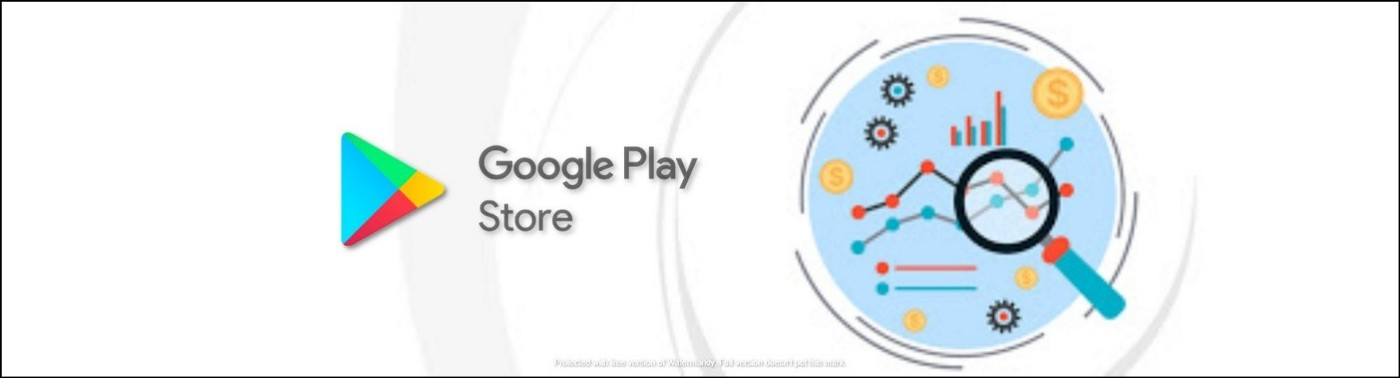

In [1]:
#Import numpy with alias np
import numpy as np
#Import pandas with alias pd
import pandas as pd
#Import seaborn with alias sns
import seaborn as sns
#Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')


In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
File1="/content/drive/MyDrive/Alma better Projects/EDA Capstone project/Play Store Data.csv"
File2="/content/drive/MyDrive/Alma better Projects/EDA Capstone project/Play store app User Reviews.csv"

In [4]:
Play_store_df=pd.read_csv(File1)
Review_Df=pd.read_csv(File2)


To have a sucess in app making business a team of developers need to work and creat app keeping in mind the two different observations first is creat an app which will people prefer to install and use and use it with satisfaction. and other observation is to create an app with people use it with satisfacion and also ready to pay for the app as there are many apps free in market.

ok Then
lets search for the best conditions for our developers and make our app shine in market.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

<b>Understanding our Data

---



In [5]:
#Play store app data
Play_store_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Play stor app user Reviews data
Review_Df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


<b>Lets have a Top View

In [6]:
#All columns from play store app data.
print(f"Play store app columns Name:-{Play_store_df.columns}")

Play store app columns Name:-Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [7]:
#All columns from play store app user Reviews data.
print(f"Play store app user Reviews columns Name:-{Review_Df.columns}")

Play store app user Reviews columns Name:-Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


<b>How big they are 

In [8]:
#Size of Data freme in terms of total no. of rows and total no. of columns
print(f"(Rows, columns):-{Play_store_df.shape}")

(Rows, columns):-(10841, 13)


In [9]:
#Size of Data freme in terms of total no. of rows and total no. of columns
print(f"(Rows, Columns):-{Review_Df.shape}")

(Rows, Columns):-(64295, 5)


<b>Dive Deep in it.</b>

lets check the traits of data in columns.

In [ ]:
#Infromation about data in columns from our first dataset(play store app data)
Play_store_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Infromation about data in columns from our second dataset(play store app Reviews data)
Review_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


<b>Dive Deep with clearity</b>

Creat a function that will present the information in datasets with clearity

In [10]:
#Make a function for detail information about data frame.
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''
#Insert columns in place of index  
  info = pd.DataFrame(index=DataFrame.columns)
#Inser Data type of columns as dtype into  Dataframe in first place   
  info['dtype'] = DataFrame.dtypes
#Inser Unique elements in each columns into  Dataframe at second place    
  info['Unique'] = DataFrame.nunique()
#Inser NUll elements in each columns into  Dataframe at third place  
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
#Inser Not NUll elements in each columns into  Dataframe at fourth place  
  info['Num_nonNullValues'] = DataFrame.count()
  return info


In [11]:
#Call the fuction for Detailed information about our first data set.
Detailed_info(Play_store_df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,9660,0,10841
Category,object,34,0,10841
Rating,float64,40,1474,9367
Reviews,object,6002,0,10841
Size,object,462,0,10841
Installs,object,22,0,10841
Type,object,3,1,10840
Price,object,93,0,10841
Content Rating,object,6,1,10840
Genres,object,120,0,10841


<b>outcomes:-</b>
<b>1.</b>We have duplicates inside "App" columns which need to be checked as if they can be kept or not.,
<b>2.</b>.We have maximum nulls in "Rating" column., <b>3.</b>.We have only "Ratings" in Float type and rest all the columns are availble in string we have work upon these.

In [ ]:
#Lets check what we have in our second dataset
Detailed_info(Review_Df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,1074,0,64295
Translated_Review,object,27994,26868,37427
Sentiment,object,3,26863,37432
Sentiment_Polarity,float64,6195,26863,37432
Sentiment_Subjectivity,float64,4530,26863,37432


<b>Outcomes:-</b><b>1.</b>We have lots of nulls in this data set., <b>2.</b>"sentiment_polarity" and "sentiment-subjectivity" columns are float type and other columns are string types.we can clean this DataFrame with minimum effort. 

#<b>Create copy of Dataframe</b>:-
<b>Instead of operating directly on playstore_data and Review_data,we’ll operate on a copy of the dataframe.

This is often a smart thing to do before we perform a data wrangling technique.

As Fequently we want to test your code to make sure that it works properly before you operate on your data directly.
Also it Give us a power to select only those columns which are most neeeded. as per our motive.

In [35]:
#Copy Play_store_df as "df"
df=Play_store_df.copy()
#Copy Review_Df as "df1"
df1=Review_Df.copy()

we will work on these columns only for now as they can give most important information which we can relate and use the insight for our project.

In [36]:
#Keeping columns which may give useful insight from play_store_df dataset
Analyse_App=['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Price','Genres', 'Content Rating','Last Updated']
#Keeping columns which may give useful insight from Review_Df dataset
Analyse_User_sentiment=['App', 'Sentiment', 'Sentiment_Polarity','Sentiment_Subjectivity']

In [37]:
#Storing Selected columns as "df" for play_store_df dataset 
df=df[Analyse_App]
##Storing Selected columns as "df1" for Review_Df dataset
df1=df1[Analyse_User_sentiment]

#App in Play_stor_df(First DF)
<b>Lets Start with our First column "App"</b>

App:- App column have names of different application from play store. First task which we will perform on it is to check for any duplictes in app.And only after further inspection we will decide if duplicates need to be kept or we dont need duplicates in our "App" column.

In [ ]:
#Check total duplicates on "App" column.
print(f"Total duplicate values in App column:",df.duplicated(subset=["App"]).sum())


Total duplicate values in App column: 1181


In [ ]:
#count dulpicates for each Applications
df["App"].value_counts()

ROBLOX                                                          9
CBS Sports App - Scores, News, Stats & Watch Live               8
Duolingo: Learn Languages Free                                  7
ESPN                                                            7
Candy Crush Saga                                                7
                                                               ..
The Societe Generale App                                        1
MegaN64 (N64 Emulator)                                          1
dB: Sound Meter Pro                                             1
Nokia mobile support                                            1
Vietnam Today - Read online newspapers, the hottest news 24h    1
Name: App, Length: 9660, dtype: int64

In [ ]:
#Call any one App name to check information in duplicates.
df[df["App"]=="8 Ball Pool"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Content Rating,Last Updated
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Sports,Everyone,"July 31, 2018"
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Sports,Everyone,"July 31, 2018"
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Sports,Everyone,"July 31, 2018"
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Sports,Everyone,"July 31, 2018"
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Sports,Everyone,"July 31, 2018"
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Sports,Everyone,"July 31, 2018"
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Sports,Everyone,"July 31, 2018"


<b>Outcome:-</b>These duplicates have same values in all the columns these can manipulate our final result. <b>Hence we will drop these duplicates.

In [15]:
#Drop duplicates from App first data set.
df.drop_duplicates(subset=["App"],inplace=True)

#App in Review_Df Data frame(second DF)

In [16]:
#user Review app column dulicates
print("Total Duplicates in App column:-",df1.duplicated(["App"]).sum())

Total Duplicates in App column:- 63221


In [44]:
df1["App"].value_counts()

CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
Angry Birds Classic                                  320
8 Ball Pool                                          300
Helix Jump                                           300
                                                    ... 
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Detector de Radares Gratis                            31
Drawing Clothes Fashion Ideas                         30
Easy Hair Style Design                                30
Name: App, Length: 1074, dtype: int64

In [47]:
Review_Df[Review_Df["App"]=="Easy Healthy Recipes"]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
38764,Easy Healthy Recipes,"It's app, I it!",Neutral,0.000000,0.000000
38765,Easy Healthy Recipes,Love recipes.,Positive,0.500000,0.600000
38766,Easy Healthy Recipes,"User friendly, many ads.",Positive,0.437500,0.500000
38767,Easy Healthy Recipes,Too many ads helpful,Positive,0.500000,0.500000
38768,Easy Healthy Recipes,This awesome,Positive,1.000000,1.000000
38769,Easy Healthy Recipes,Very helpful,Positive,0.200000,0.300000
38770,Easy Healthy Recipes,Just started looking recipe looks tasty,Neutral,0.000000,0.000000
38771,Easy Healthy Recipes,"Easy, delicious recipes user friendly layout. ...",Positive,0.608333,0.733333
38772,Easy Healthy Recipes,Love recipes. The I fixed last night family lo...,Positive,0.340000,0.493333
38773,Easy Healthy Recipes,NaN,NaN,NaN,NaN


<b>Outcome:-</b>App in Play store app user reviews also have duplicates but we cant judge them using previous criteria here duplicates may have different values as per different user Translated_Reviews.<b>Hence We not going to drop the Duplicates in this data set.

In [ ]:
#Lets have some insight from numeric data (Play store Data)
df.describe()


,Rating
count,8197.000000
mean,4.175052
std,0.561026
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
#Lets have some insight from numeric data (Play store App Review)
df1.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


<b>It seems as we have big mess in the "Rating" columns its seem to have an Outliar.

#Outliars
Rating of any app can only range  from 1 to 5. still we can see there
There is amaximum value of 19.0. This is a outliar.</b>
<b>An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors.</b>
To deal with outliar we have to analyse our data.The analysis for outlier detection is referred to as outlier mining.mining!! yes you heard it right mining it is not the way done with coal field but the concept is same we have digg out where outliars are available in our data and then we have opertions to remove them.
Lets start the hunt for outliars. 



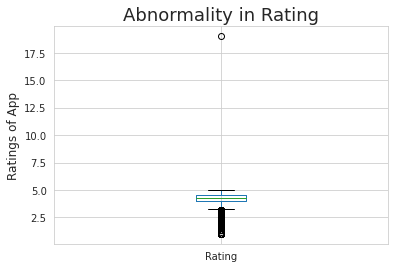

In [22]:
#Plot the "Rating" column using boxplot
df.boxplot(["Rating"]);
#Title of graph and fontsize
plt.title("Abnormality in Rating",fontsize=18)
#Y-axis label and fontsize
plt.ylabel("Ratings of App",fontsize=12)
plt.show()

<b>Outcome:-</b>Their is a considerable amount difference we can spot on "Ratings".Lets find its position and our data frame.

In [34]:
#Finding outliar in Rating column using iteration using lambda function and locking that value in a variable
Outliar=df["Rating"].loc[lambda x:x>5]
#Calling outliar on its position in dataframe
Outliar.reset_index()

,index,Rating
0,10472,19.0


<b>We got our creepy creature messing our data.</b>

  

In [55]:
#Check if this outliar is havng any useful data in any other column.
df.loc[10472].reset_index()


KeyError: ignored

<b>We have to drop this Row with outliar.As this particular row with outliar is useless with all wrong informations.

In [53]:
#Drop Outliar Row
df.drop([10472], inplace=True)

KeyError: ignored

<b>Now lets check how Rating looks like

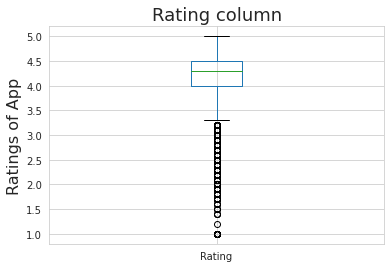

In [59]:
#check for Rating after droping Outliar

#Plot the "Rating" column using boxplot
df.boxplot(["Rating"]);
#Title of graph and fontsize
plt.title("Rating column",fontsize=18)
#Y-axis label and fontsize
plt.ylabel("Ratings of App",fontsize=16)
plt.show()

<b>Outcome:-</b>Removed the outliar and saved our data from distortion

<b>lets digout outliars in our (Second DF) data set.

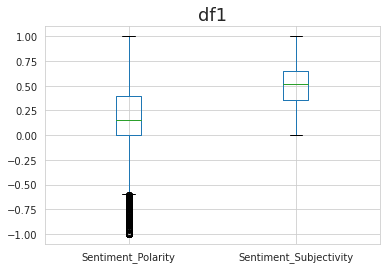

In [62]:
#Range of values

#Plot the numerical column using boxplot for their values range.
df1.boxplot();
#Title of graph and fontsize
plt.title("df1",fontsize=18)

plt.show()

<b>Outcome:-</b>Its is clean for outliar.And values are under range. <b>1</b>Sentiment_Ploarity should varies between -1 to 1  and <b>2.</b>sentiment_subjectivity should be in range from 0 to 1.

#Nulls
<b>Its time to move ahead and hunt down the nulls in our data set.,</b>


In [63]:
#checking info for further steps to clean 
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,9659,0,10840
Category,object,33,0,10840
Rating,float64,39,1474,9366
Reviews,object,6001,0,10840
Size,object,461,0,10840
Installs,object,21,0,10840
Type,object,2,1,10839
Price,object,92,0,10840
Genres,object,119,0,10840
Content Rating,object,6,0,10840


<b>Outcome:-</b> We have Nulls in:-
*Rating,Type,*



#Rating(df)
<b>For the Nulls in Rating lets work on them and try to find if they can be converted to mean median, mode or they also need to droped out.

In [73]:
#Quick Check for mean, median and mode for "Rating"
print("Mean for Rating Column:-",df["Rating"].mean())
print("Median for Rating column:-",df["Rating"].median())
print("Mode for Rating column:-",df["Rating"].mode())
print("Maximmum from Rating column",df["Rating"].max())


Mean for Rating Column:- 4.191757420456978
Median for Rating column:- 4.3
Mode for Rating column:- 0    4.4
dtype: float64
Maximmum from Rating column 5.0


In [74]:
#Drop nulls from "Ratiing"
df.dropna(subset=["Rating"],inplace=True)

converting nulls from Rating to mean,median or mode will pull the Apps(Ratings) with 0 to Rating till 4 and above. we dont want to take risk for 1463 App data to be manipulate.These can distort visualization. Made us have wron Assumpions.

<b>Hence.
sorry "Null in Rating".

#Nulls from (Second DF)

In [75]:
#checking info for further steps to clean second Dataset 
Detailed_info(df1)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,1074,0,64295
Sentiment,object,3,26863,37432
Sentiment_Polarity,float64,6195,26863,37432
Sentiment_Subjectivity,float64,4530,26863,37432


In [76]:
#Drop Nulls from complete Data set 
df1.dropna(inplace=True)

<b>Lots of nulls.</b>The Nulls in Sentiment,sentiment_polarity,sentiment_subjectivity these are not very impressive as amount of these nulls ais same for all the important columns. <b>Hence we can be droped them.


#Reviews(df)
<b>Reviews column Data should be integer type.But it is available to us in string type.
lets checkwhat all operation we need to performe on them. 
Also we need Reviews in int type only not even in float.As people Reviews cant be like 3.4 or 565.4.

In [89]:
#Check all the unique elements thoroughly for any other special character or something.
print("List of Unique strings from Reviews:-",list(df.Reviews.unique()),end="")

List of Unique values from Reviews:- ['159', '967', '87510', '215644', '167', '178', '36815', '13791', '121', '13880', '8788', '44829', '4326', '1518', '55', '3632', '27', '194216', '224399', '450', '654', '7699', '118', '192', '20260', '203', '136', '223', '1120', '227', '5035', '1015', '353', '564', '8145', '36639', '158', '591', '117', '176', '295221', '2206', '26', '174531', '1070', '85', '845', '367', '1598', '284', '17057', '129', '542', '10479', '805', '1403', '3971', '534', '7774', '38846', '2431', '6090', '295', '190', '40211', '356', '52530', '116986', '1379', '271920', '736', '7021', '197', '737', '3574', '994', '197136', '142', '15168', '2155', '138', '5414', '21777', '348', '250', '13372', '7880', '3617', '4806', '65786', '31433', '5097', '1754', '2680', '1288', '18900', '49790', '1150', '1739', '32090', '2225', '4369', '8572', '964', '42050', '104', '17934', '601', '36', '187', '30', '134', '74', '113715', '3595', '9315', '75', '38', '26834', '2277', '2280', '184', '9', '

In [90]:
#convert "Reviews" to int type
df["Reviews"]=df["Reviews"].astype(int)

#Using lambda function same process.
df["Reviews"]=df["Reviews"].apply(lambda x:int(x))

In [93]:

Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,8196,0,9366
Category,object,33,0,9366
Rating,float64,39,0,9366
Reviews,int64,5992,0,9366
Size,object,414,0,9366
Installs,object,19,0,9366
Type,object,2,0,9366
Price,object,73,0,9366
Genres,object,115,0,9366
Content Rating,object,6,0,9366


<b>outcome:-</b>Converted Reviews from string to int type.

#Size(df)
<b>Size is also availabel in string type. we need to check what operation do we need for size.

In [97]:
#call unique elements from size
print("All the unique Elements from Size ",df.Size.unique())

All the unique Elements from Size  ['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '23M' '6.0M'
 '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device' '9.4M' '15M'
 '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M' '201k' '3.6M'
 '5.7M' '8.6M' '2.4M' '27M' '2.5M' '7.0M' '16M' '3.4M' '8.9M' '3.9M'
 '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M' '9.0M'
 '6.7M' '30M' '2.6M' '7.1M' '22M' '6.4M' '3.2M' '8.2M' '4.9M' '9.5M'
 '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M' '4.0M' '2.3M' '2.1M' '42M' '9.1M'
 '55M' '23k' '7.3M' '6.5M' '1.5M' '7.5M' '51M' '41M' '48M' '8.5M' '46M'
 '8.3M' '4.3M' '4.7M' '3.3M' '40M' '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M'
 '79k' '8.4M' '3.7M' '118k' '44M' '695k' '1.6M' '6.2M' '53M' '1.4M' '3.0M'
 '7.2M' '5.8M' '3.8M' '9.6M' '45M' '63M' '49M' '77M' '4.4M' '70M' '9.3M'
 '8.1M' '36M' '6.9M' '7.4M' '84M' '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M'
 '556k' '526k' '76M'

<b>Size is realy very flilthy need some extract efforts to clean it.</b>

Size in MB and KB is represented as M and K and we also have "Varies with Device" at some points its a tricky task to clean it.lets get our hand dirty.
<b>we are also going to generate some Nulls here.</b>
be prepare for those also.

In [106]:
#Replace M and k with empty string. Here M & K denotes MB & KB. 
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
#change k(KB) into MB convert string with k to float & divide by 1024
#convert kB into MB (1024Kb=1Mb) 
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)


In [107]:
#convert rest all elements also into numeric type.
#"errors='coerce'".It will replace all non-numeric values with NaN
df["Size"] = df["Size"].apply(pd.to_numeric, errors='coerce')



<b>we have some nulls now Lets check if we can adjust them or there will be any major problem for us using them.

In [108]:
#Count the nulls in Size
df.Size.isnull().sum()


1637

In [119]:
#Exploring what change these nulls can create put shaped into mean, median and mode
print("The Mean for Size is:-",df.Size.mean())
print(f"The Median for size is:-{df.Size.median()}")
print(f"The Mode for size is:-{df.Size.mode()}")
print("The max value for size is:",df["Size"].max())
print("The Min. value for Size is:-",df["Size"].min())

The Mean for Size is:- 22.957270747246504
The Median for size is:-14.0
The Mode for size is:-0    14.0
dtype: float64
The max value for size is: 100.0
The Min. value for Size is:- 0.00830078125


<b>ok we can mange you guys(NUlls generated during manipulation).Droping everytime is not good practise as it can end up droping important data available in other features.They can be crucial.

<b>Hence if Nulls are managable in such a way that they do not bring adverse impact in our conclusion then they should be managed.

In [120]:
#Transform Nulls into median value
df["Size"] = df["Size"].fillna(df["Size"].median())

#Installs(df)
<b>Installs column have string with "," in between string and "+"at the end of string.lets manipulate them and convert them to int type



In [125]:
#lamda fuction to remove last part(+) using .rstrip()
df["Installs"]=df["Installs"].apply(lambda x:x.rstrip("+"))
df["Installs"]= df["Installs"].map(lambda x:x.replace(",",""))


In [126]:
#Convert Installs from Str type to int type
df["Installs"]=df["Installs"].astype(int)

#Type(df)
It is good to go without any interuptions

In [159]:
#Call Unique elements
print("Total Unique elements in Type:-",df.Type.unique())

Total Unique elements in Type:- ['Free' 'Paid']


#Price
<b>Need some cleaning


In [161]:
print("Total Unique elements in Price:-",df.Price.unique())

Total Unique elements in Price:- ['0' '$4.99' '$3.99' '$6.99' '$7.99' '$5.99' '$2.99' '$3.49' '$1.99'
 '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99'
 '$79.99' '$16.99' '$14.99' '$29.99' '$12.99' '$2.49' '$10.99' '$1.50'
 '$19.99' '$15.99' '$33.99' '$39.99' '$3.95' '$4.49' '$1.70' '$8.99'
 '$1.49' '$3.88' '$399.99' '$17.99' '$400.00' '$3.02' '$1.76' '$4.84'
 '$4.77' '$1.61' '$2.50' '$1.59' '$6.49' '$1.29' '$299.99' '$379.99'
 '$37.99' '$18.99' '$389.99' '$8.49' '$1.75' '$14.00' '$2.00' '$3.08'
 '$2.59' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04' '$13.99' '$4.29'
 '$3.28' '$4.60' '$1.00' '$2.95' '$2.90' '$1.97' '$2.56' '$1.20']


<b>Price column is in string type and have "$" character.convert it to numeric type and change name from price to price in Dollar.

In [162]:
#Remane Peice to Price_Dolar
df.rename(columns={"Price":"Price_in_Dollar"},inplace=True)


In [163]:
#Replace Character empty string and word string with NaN.
df["Price_in_Dollar"]=df["Price_in_Dollar"].apply(lambda x: str(x).replace("$", ""))
df["Price_in_Dollar"]=df["Price_in_Dollar"].apply(lambda x: str(x).replace(",", ""))


In [164]:
#Convert string to numeric
df["Price_in_Dollar"] = df["Price_in_Dollar"].apply(pd.to_numeric, errors='coerce')

In [168]:
#Check if any null generated during our process
df.Price_in_Dollar.isnull().sum()

0

In [169]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,8196,0,9366
Category,object,33,0,9366
Rating,float64,39,0,9366
Reviews,int64,5992,0,9366
Size,float64,412,0,9366
Installs,int64,19,0,9366
Type,object,2,0,9366
Price_in_Dollar,float64,73,0,9366
Genres,object,115,0,9366
Content Rating,object,6,0,9366


#Content Rating
<b>Good to go without any interruption.

In [173]:
#Print unique elements from Ratiing
print("TOtal Unique Values in Content Rating:-",df["Content Rating"].unique())

TOtal Unique Values in Content Rating:- ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


#Genres
We can Extract some detail about Categories from Genres.

We can store them as list spliting from Semmicolon.



In [176]:
#Store Genres as list 
df['Genres'] = df['Genres'].apply(lambda x: x.split(";") if type(x) == str else x)

In [ ]:
mergedf = pd.merge(df, df1, on='App', how = 'inner')

#Last Updated
Last Update Dates Available in string type.converting it to Pandas datetime type. 

In [222]:
#Print unique value from Last Updated
df["Last Updated"].unique()


array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [223]:
#Convert string type to datetime type
df["Last Updated"]=df["Last Updated"].apply(lambda x:pd.to_datetime(x))

#Data Visualization
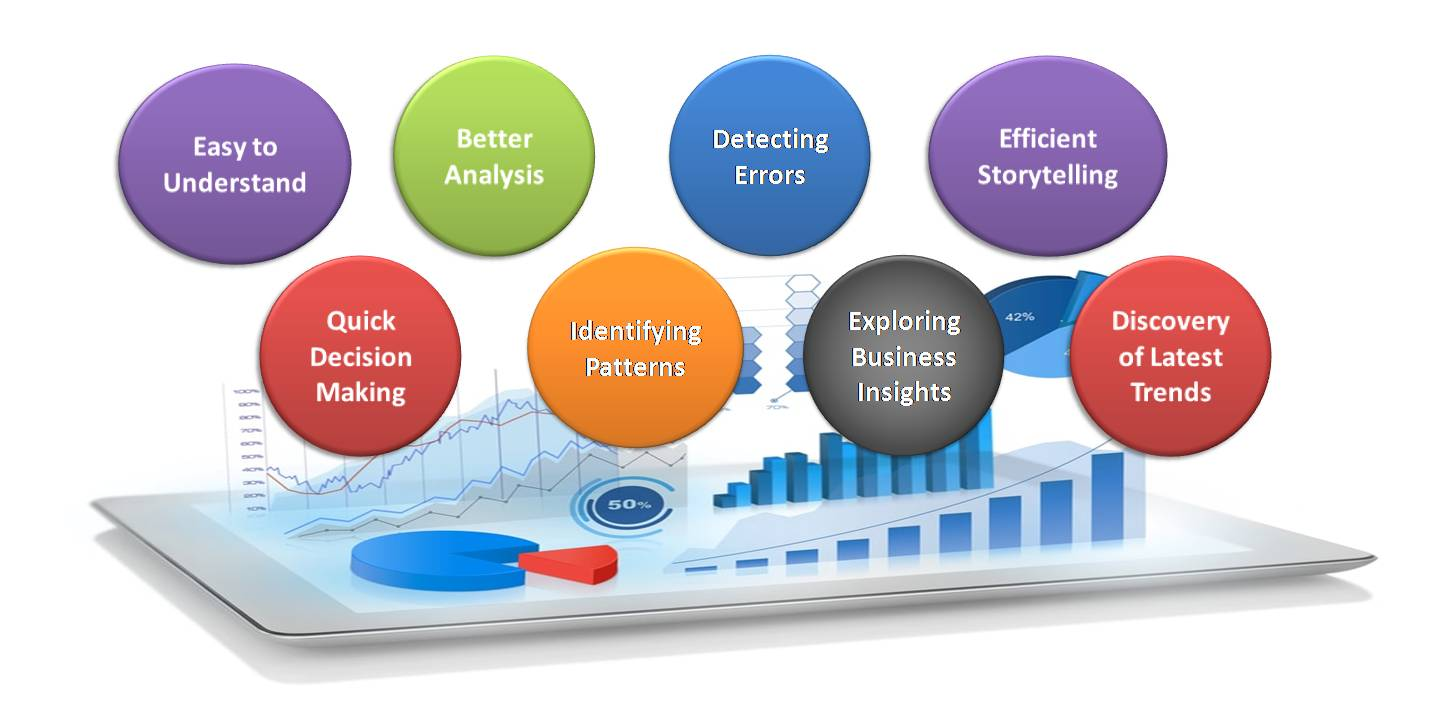

#The number of Applications with their respective categories. 
<b>Lets Start with exploring the total number of apps in each categories.

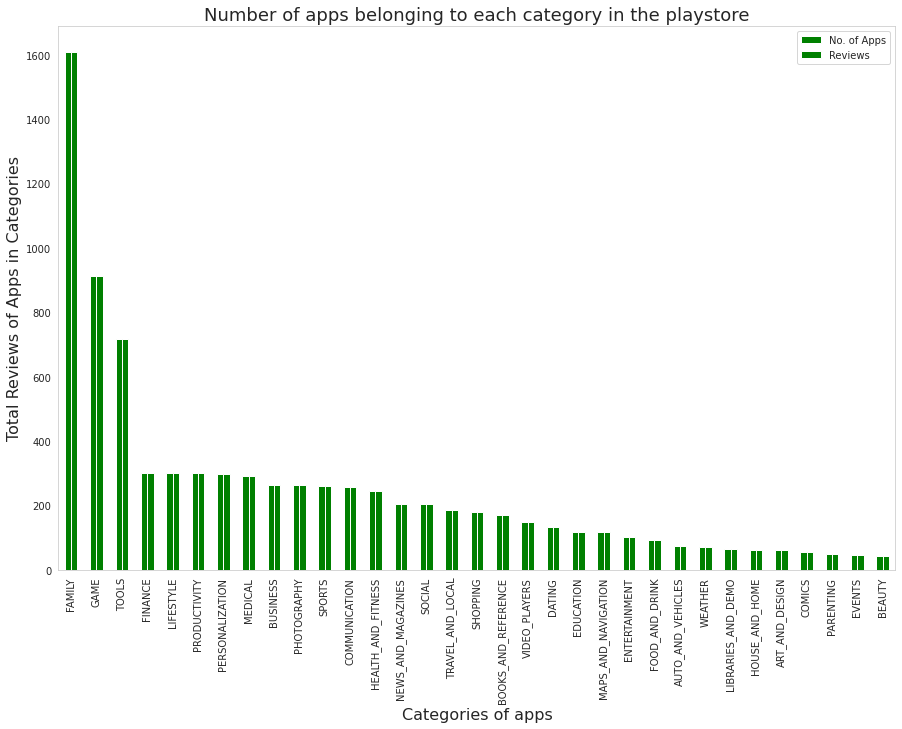

In [ ]:
#store groupby object from "Category",aggregated them "Reviews: count",sort them with Reviews count in a separate variable.
Apps_in_Categories=df.groupby(["Category"]).agg({"Reviews": "count","App":"count"}).sort_values(by="Reviews",ascending=False)
#Plot a bar graph with given size and colour.
Apps_in_Categories.plot.bar(figsize = (15,10),color='g')
#Title for our Graph,with given fontsize.
plt.title('Number of apps belonging to each category in the playstore',fontsize=18)
#Y-axis label,with given fontsize.
plt.ylabel('Total Reviews of Apps in Categories',fontsize=16)
#X-axis label,with given fontsize.
plt.xlabel('Categories of apps',fontsize=16)
#legend indicating bar
plt.legend(['No. of Apps',"Reviews"]);
#Remove grid lines
plt.grid(False)


<b>Outcome:-</b>

1.Categories like Family ,Games,Tools have more amount of apps in them.which we need to consider during our final conclusion.

2.There is direct correlation between No.of Apps and Reviews in each category.

<b>Conclusion:-</b>We have lots of Apps in Categories like Family, Games,Tools. 

<b>Take away for further steps:-</b>we need to analyse how users have Rated them,installation and if they are free or paid.

#Correlation between numerical Datatypes in Data set.
<b>Before Going for further exploration lets check if there is any correlation between our features in the data set.

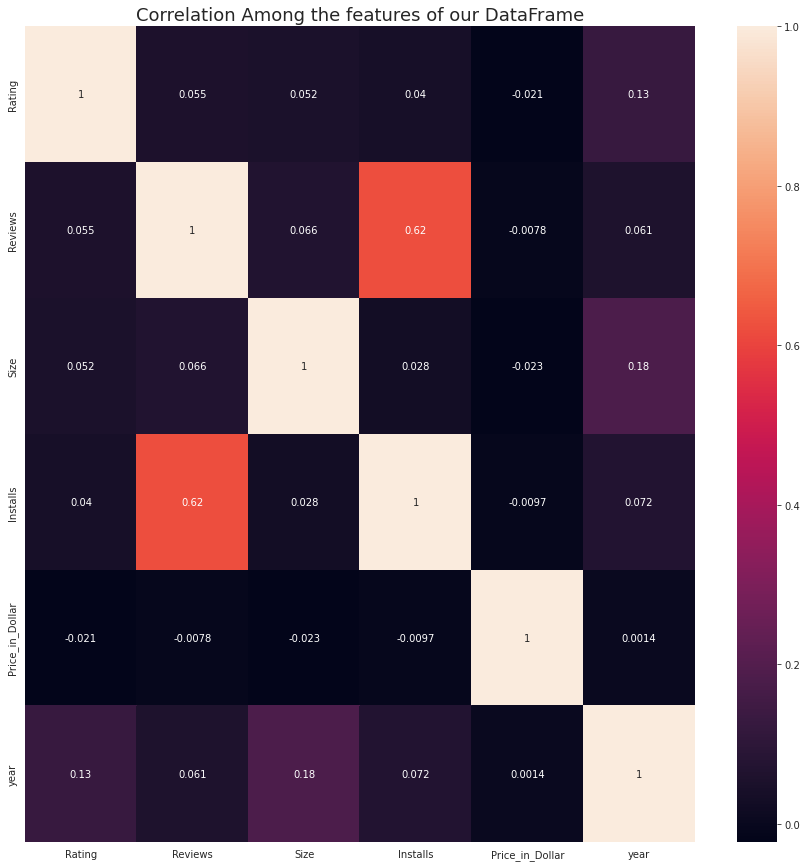

In [ ]:
#Fnd if any correlation between the Numerical data type in our first dataset(Play store app data)
#Size of given graph
plt.figure(figsize = (15,15))
#Using .corr method check for correlation between any numeric features. 
df.corr(method ='pearson')
#Seabon heat map used to show correlation and "annot=True" for values representation inside map
sns.heatmap(df.corr(),annot=True)
#Title for our Graph,with given fontsize.
plt.title('Correlation Among the features of our DataFrame',fontsize=18)
plt.show()


<b>Outcome:-</b>There is major correlation between Installs and Reviews and this is due to the reason that that most no. of users who have installed the app have given their Reviews.

In [ ]:
df["Reviews"].median()
# f["Installs"].median()

3004.0

#Total percentages of Free and Pid apps in Play store app dataset.

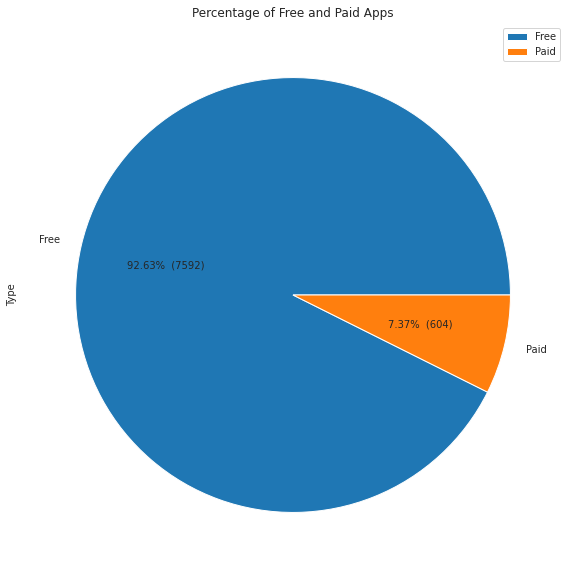

In [ ]:
#For Maintain size ratio of figure 
plt.rcParams['figure.figsize']=(10,10)
#Def a Function To make the Count of Free and Paid in Number corresponding to their Percentage value 
def pull_autopct(values):
    def Type_autopct(pct):
        total = sum(values)
        value = int(round(pct*total/100.0))
        return '{p:1.2f}%  ({v:d})'.format(p=pct,v=value)
    return Type_autopct
#Data input to be visualised on pie chart with percentage Value
df["Type"].value_counts().plot.pie( autopct=pull_autopct(df["Type"].value_counts()));

plt.title("Percentage of Free and Paid Apps");
plt.legend();

<b>outcome:-</b>Majority of Apps available are for free on play store.

#Q.content Rating 

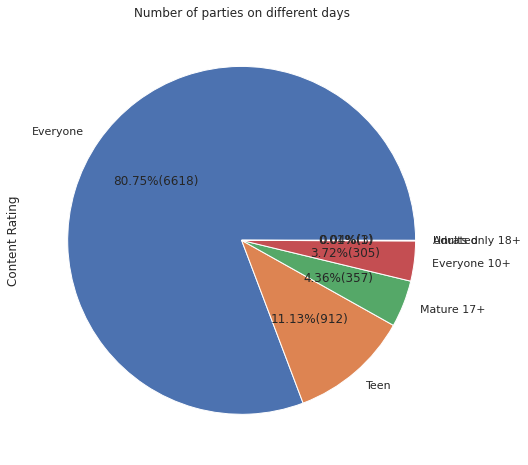

In [ ]:
#Using Seagon library creating Pie chart with Perctange correspond to values in them.
sns.set()
df["Content Rating"].value_counts().plot(kind='pie', title='Number of parties on different days', figsize=[10,8],
          autopct=lambda p: '{:1.2f}%({:1.0f})'.format(p,(p/100)*df["Content Rating"].value_counts().sum()))
plt.show()

<b>Outcome:-</b>Majority of apps available on play store belongs to Category of "Everyone".Means Everyone can use them without any restriction.

#Average Size of apps in our data set

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


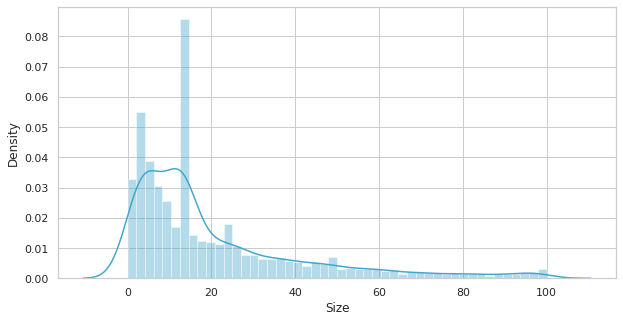

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
sns.distplot(df["Size"], color="#43a6cc");

#Category vs Rating

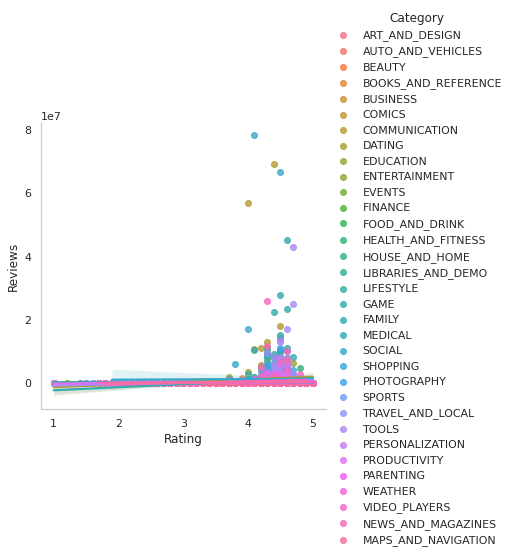

In [ ]:
# sns.set_style( {'axes.grid' : False})
sns.lmplot(x='Rating',y='Reviews',data=df,hue="Category")

#Type vs Install

How number of installations were influenced by the app type which in this case - if the app was available for free or it was paid..

In [ ]:
#Create a data frame which is gropby "Category" and "Type" on sum of Installs for each Category.
install_vs_Type=df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
install_vs_Type

,Category,Type,Installs
0,ART_AND_DESIGN,Free,114217100
1,ART_AND_DESIGN,Paid,16000
2,AUTO_AND_VEHICLES,Free,53079800
3,AUTO_AND_VEHICLES,Paid,50000
4,BEAUTY,Free,26916200
...,...,...,...
56,TRAVEL_AND_LOCAL,Paid,182000
57,VIDEO_PLAYERS,Free,3926726200
58,VIDEO_PLAYERS,Paid,71000
59,WEATHER,Free,360285000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


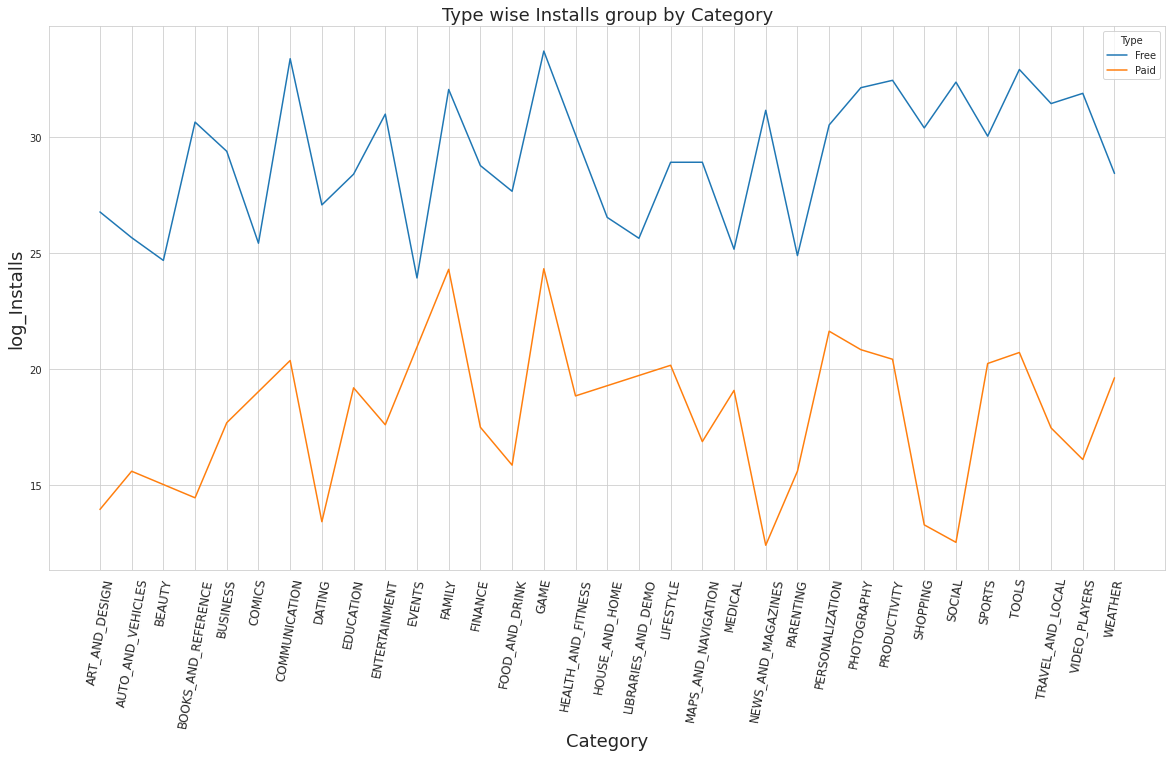

In [ ]:
#Size of graph
plt.figure(figsize=(20,10));
#Orientation of xticks and fontsize
plt.xticks(rotation=80,fontsize=12);
#Title of Graph and frontsize
plt.title("Type wise Installs group by Category",fontsize=18);
#Graph with category and log value of Installs with "Type" hue parameter
sns.lineplot('Category', np.log2(install_vs_Type['Installs']), hue='Type', data=install_vs_Type);
plt.xlabel("Category",fontsize=18);
plt.ylabel("log_Installs",fontsize=18);
plt.show();


<b>Outcome:-</b>Although there are more number of free app installed by user but still their are categories where user are happy to pay for the app.These categories are Family, Games , Entertainment,Tools,weather,entertainment etc.

<b>Applications with Total Ratings 4 and above.

In [ ]:
#Distribution of categries based on Ratings above 4.5
Number_of_Ratings_for_Categories=df.groupby(["Category",df["Rating"].loc[lambda x : x>4.5]])["Rating"].sum().unstack()
Number_of_Ratings_for_Categories


Rating,4.6,4.7,4.8,4.9,5.0
Category,,,,,
ART_AND_DESIGN,13.8,61.1,24.0,NaN,5.0
AUTO_AND_VEHICLES,50.6,NaN,24.0,24.5,NaN
BEAUTY,13.8,28.2,4.8,4.9,NaN
BOOKS_AND_REFERENCE,105.8,94.0,52.8,19.6,30.0
BUSINESS,78.2,65.8,43.2,14.7,90.0
COMICS,18.4,23.5,9.6,NaN,10.0
COMMUNICATION,55.2,4.7,28.8,NaN,25.0
DATING,9.2,28.2,24.0,4.9,30.0
EDUCATION,69.0,65.8,9.6,9.8,NaN


Text(0.5, 0, 'Categories')

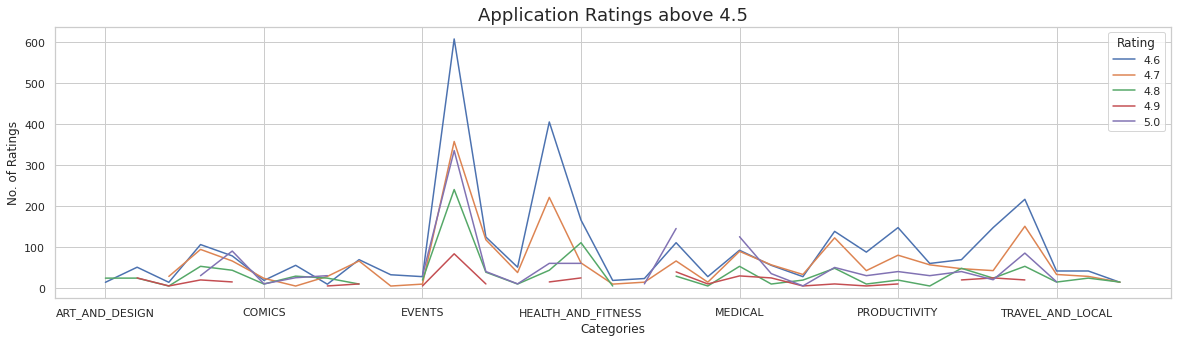

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
Number_of_Ratings_for_Categories.plot()
plt.title('Application Ratings above 4.5',fontsize=18)
plt.ylabel('No. of Ratings')
plt.xlabel('Categories')


<b>Lets filter them further with Installs and Rating abouve 4.8

In [ ]:
Filer=df.groupby(["Category",df["Rating"].loc[lambda x : x>4.8]])["Installs"].median()


In [ ]:
df["Installs"].median()

100000.0

Text(0.5, 0, 'Categories')

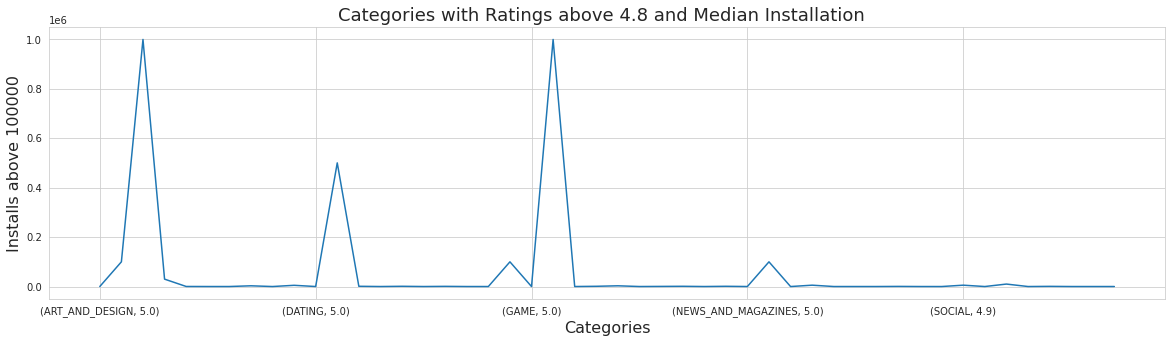

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
ins.plot()
plt.title('Categories with Ratings above 4.8 and Median Installation  ',fontsize=18)
plt.ylabel('Installs above 100000',fontsize=16)
plt.xlabel('Categories',fontsize=16)

#Rating vs Size Scatter plot



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


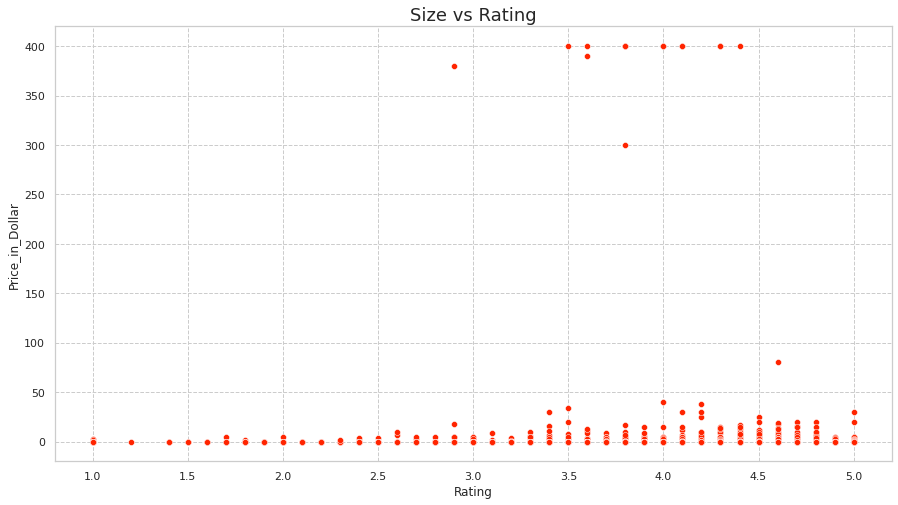

In [ ]:
## scatter plot for 'Rating' vs 'price in dollar'.
plt.subplots(figsize=(15,8));
sns.scatterplot(df["Rating"],df["Price_in_Dollar"],data=df)
plt.title('Size vs Rating',fontsize=18)
plt.grid(linestyle='--')
plt.show()


<b>Outcome</b>Expensive Paid apps have higher ratings.

#Latest Updated
<b>we see what we have in Last update and how can we extract useful information for our project.

In [ ]:
df["Last Updated"]

In [ ]:
#creating new column storing year only
df['year']= pd.DatetimeIndex(df["Last Updated"]).year

In [ ]:
#store uique elements of year
unique=df['year'].unique()
#count and store values of years
value=df['year'].value_counts()

In [ ]:
#sort by years
unique.sort()
#Sort by years 
val=value.sort_index(ascending=True)
val


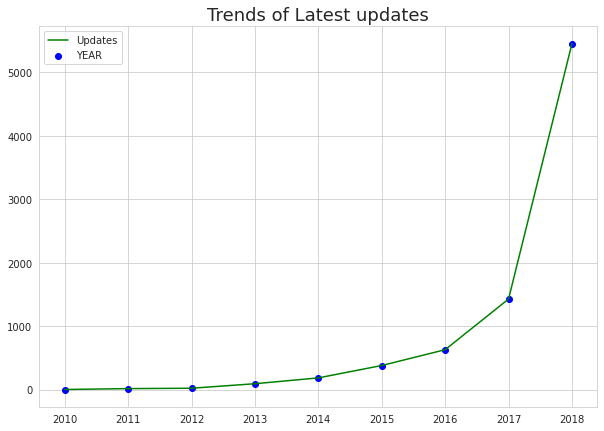

In [ ]:
#Determine size of Graph
plt.figure(figsize = (10,7))
#Scatterplot showing update years.
plt.scatter(unique, val, c ="blue")
#line representing trent of updates in year
plt.plot(unique, val, c ="green")
#Title of our graph
plt.title("Trends of Latest updates",fontsize=18)
#legends
plt.legend(["Updates","YEAR"])
plt.show()

<b>Outcome:-</b>Our graph is increasing with year.This is showing we have lots of app which were Recently updated.
This also signifies that the users have started using lots of apps after the year 2017 due digital revolution and availability of Mobil phones.

#Merging both the Files.

In [ ]:
# Merge second dataframe(Play store app Review)  with first DataFrame(Play store app data) useing inner join.
mergedf = pd.merge(df, df1, on='App', how = 'inner')
mergedf.head(5)

In [139]:
Detailed_info(mergedf)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,816,0,72576
Category,object,33,0,72576
Rating,float64,22,0,72576
Reviews,int64,1067,0,72576
Size,float64,166,0,72576
Installs,int64,12,0,72576
Type,object,2,0,72576
Price,object,9,0,72576
Genres,object,68,0,72576
Content Rating,object,5,0,72576


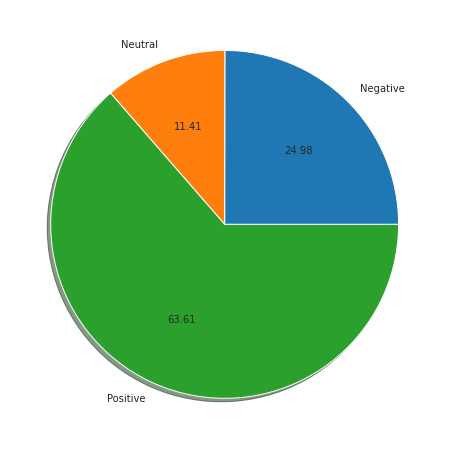

In [130]:
# Visualize the composition through a pie chart
fig,ax1 = plt.subplots(figsize=(12,8))
sentiments = mergedf.groupby('Sentiment').size()
plt.pie(sentiments,labels=['Negative','Neutral','Positive'],shadow=True,autopct='%.2f')
plt.show()

In [ ]:
df.corr(method ='kendall')
plt.figure(figsize = (10,7))
sns.heatmap(mergedf.corr(method ='kendall'), annot= True)

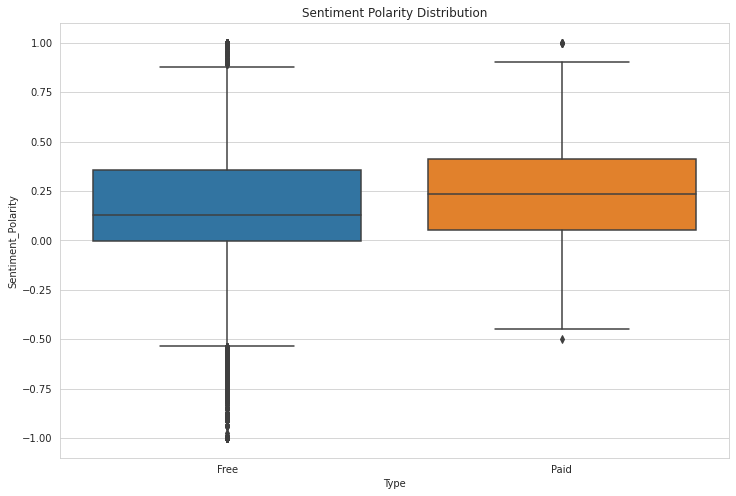

In [132]:
# Visualize the Sentiment Polarity Distribution for Free and Paid apps
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = mergedf)
ax.set_title('Sentiment Polarity Distribution')
plt.show()

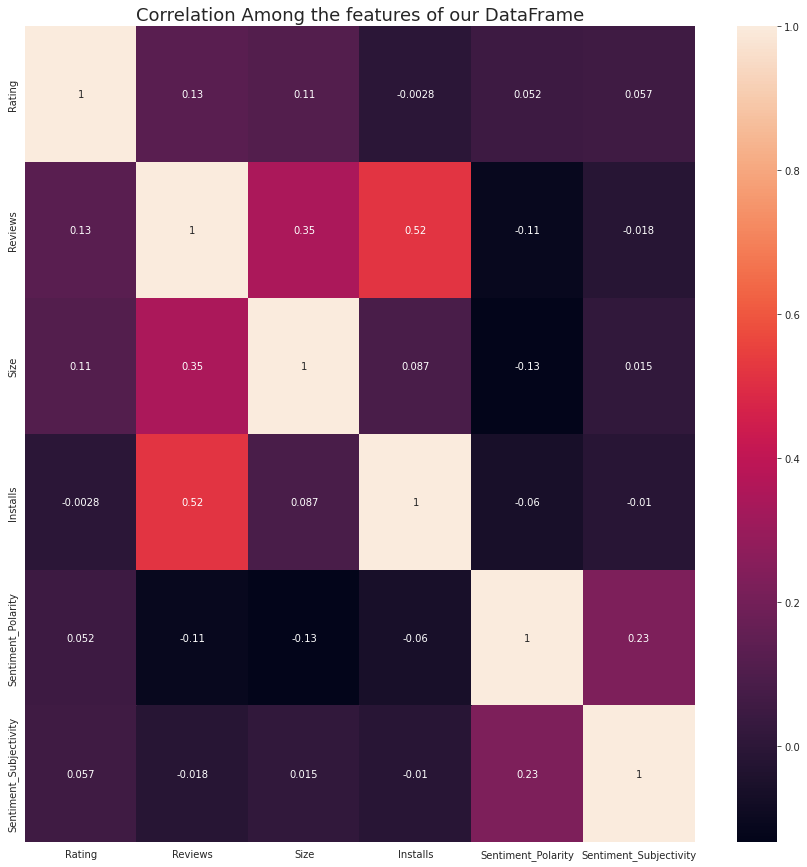

In [228]:
#Fnd if any correlation between the Numerical data type in our first dataset(Play store app data)
#Size of given graph
plt.figure(figsize = (15,15))
#Using .corr method check for correlation between any numeric features. 
df.corr()
#Seabon heat map used to show correlation and "annot=True" for values representation inside map
sns.heatmap(mergedf.corr(),annot=True)
#Title for our Graph,with given fontsize.
plt.title('Correlation Among the features of our DataFrame',fontsize=18)
plt.show()

Effect of positive sentiments on Ratings

In [ ]:
gr=mergedf.groupby(["Category",mergedf["Sentiment"].loc[lambda x:x=="Positive"]])[["Rating"]].median()
gr

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
gr.plot()
plt.title('Categories with Ratings above 4.8 and Median Installation  ',fontsize=18)
plt.ylabel('Installs above 100000',fontsize=16)
plt.xlabel('Categories',fontsize=16)

In [242]:
gr1=mergedf.groupby(["Category",mergedf["Sentiment"].loc[lambda x:x=="Positive"]])[["Size"]].median()

Text(0.5, 0, 'Categories')

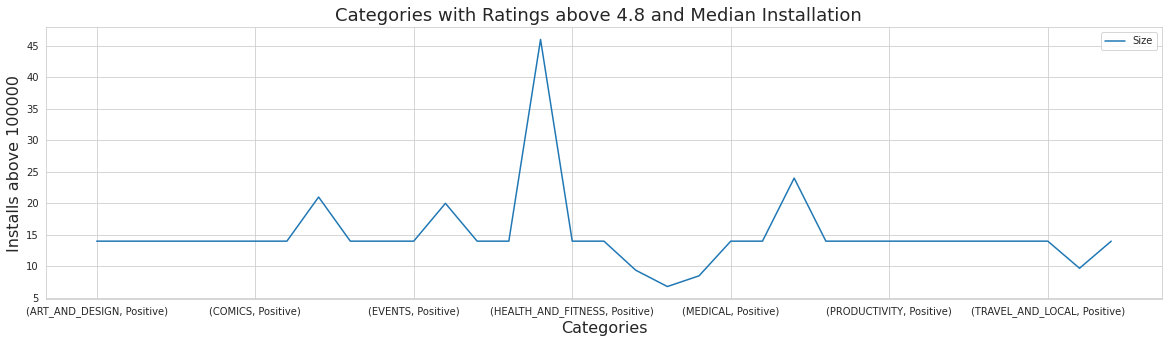

In [243]:
plt.rcParams['figure.figsize'] = (20, 5)
gr1.plot()
plt.title('Categories with Ratings above 4.8 and Median Installation  ',fontsize=18)
plt.ylabel('Installs above 100000',fontsize=16)
plt.xlabel('Categories',fontsize=16)

In [255]:
gr3=mergedf.groupby(["Category",mergedf["Sentiment"].loc[lambda x:x=="Positive"]])[["Installs"]]

#Conclusion

<b>1.Analysisng Generes we food that there is a huge customer base at categries like Tools,Education,Entertanment.This shows users are ready to get upgrade and entertain themself with right Application.

2.Most of the apps are free and belong to Everyone category.

3.With least number of Apps in the categories like Beauty,Event,Parenting,Cosmetic.still they have really high customer base with over average Ratings.

4.Most of the apps receive Positive reviews i.e., about 63.5%. Free apps might have a broader range of reviews than Paid apps but the median of Sentiment Polarity is higher in Paid apps.